In [9]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing

df = pd.read_csv("USGas.csv", names=["USGas"])
df

,USGas
0,2510.5
1,2330.7
2,2050.6
3,1783.3
4,1632.9
...,...
233,2115.2
234,2407.5
235,2437.2
236,2215.6


In [10]:
df.set_index(
    pd.date_range(datetime(2000, 1, 1), datetime(2019, 11, 1), freq="M"), inplace=True
)



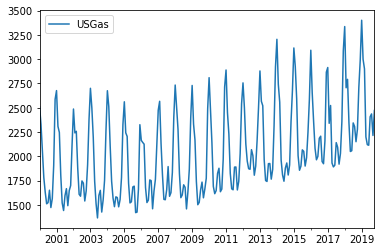

In [11]:
df.plot()

In [12]:
train_set = df[: datetime(2018, 11, 1)]
test_set = df[datetime(2018, 11, 1) :]



In [13]:
fit1 = ExponentialSmoothing(train_set, trend="add", seasonal="add",).fit()
fit2 = ExponentialSmoothing(train_set, trend="add", seasonal="mul",).fit()
fit3 = ExponentialSmoothing(train_set, trend="mul", seasonal="add",).fit()
fit4 = ExponentialSmoothing(train_set, trend="mul", seasonal="mul",).fit()

fcast1 = fit1.forecast(test_set.shape[0])
fcast2 = fit2.forecast(test_set.shape[0])
fcast3 = fit3.forecast(test_set.shape[0])
fcast4 = fit4.forecast(test_set.shape[0])



/home/luq/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/home/luq/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


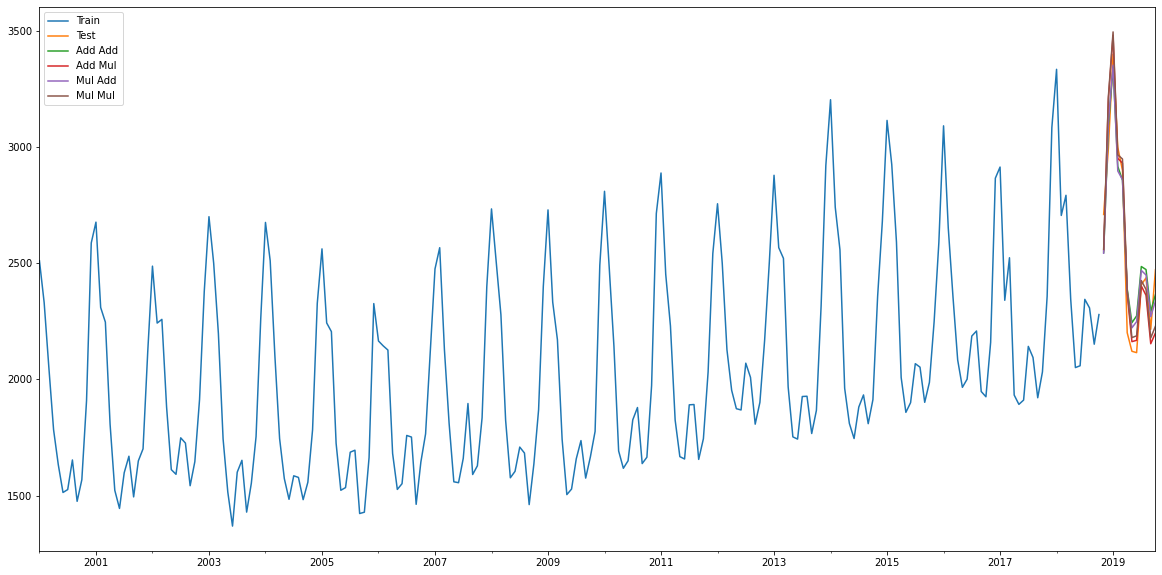

In [14]:
ax = train_set.plot()
test_set.plot(ax=ax, figsize=(20,10))
fcast1.plot(ax=ax)
fcast2.plot(ax=ax)
fcast3.plot(ax=ax)
fcast4.plot(ax=ax)
ax.legend(["Train", "Test", "Add Add", "Add Mul", "Mul Add", "Mul Mul"])

In [15]:
mse1 = mean_squared_error(test_set, fcast1)
mse2 = mean_squared_error(test_set, fcast2)
mse3 = mean_squared_error(test_set, fcast3)
mse4 = mean_squared_error(test_set, fcast4)

print(f"MSE for add add: {mse1}")
print(f"MSE for add mul: {mse2}")
print(f"MSE for mul add: {mse3}")
print(f"MSE for mul mul: {mse4}")

MSE for add add: 12382.018522601682
MSE for add mul: 16315.402820643421
MSE for mul add: 11625.491536494059
MSE for mul mul: 15906.91672196386
